<a href="https://colab.research.google.com/github/AnushkaX/machine_learning_models/blob/main/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#RAW DATASET 
# Pandas is used for data manipulation
import pandas as pd

# Read in data and display first 5 rows
features = pd.read_csv('sample_data/ResearchCSV - Sheet1.csv')
features.head(5)

,Timestamp,Your Age?,Your Gender?,Your Field?,Theme 1,Theme 2,Theme 3,Theme 4,Theme 5,Theme 6,...,Theme 11,Theme 12,Theme 13,Theme 14,Theme 15,Theme 16,Theme 17,Theme 18,Theme 19,Theme 20
0,10/21/2021 22:25:33,24,Male,IT / Computer Science,NaN,NaN,Theme 3,NaN,Theme 5,NaN,...,Theme 11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/21/2021 22:27:01,24,Male,Statistics,Theme 1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/4/2021 17:49:00,25,Female,IT / Computer Science,Theme 1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/4/2021 17:49:38,25,Female,Marine and Nautical Science,Theme 1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Theme 15,NaN,NaN,NaN,NaN,NaN
4,11/4/2021 17:49:46,25,Male,Statistics,Theme 1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print('The shape of our features is:', features.shape)

The shape of our features is: (237, 24)


In [4]:
features.describe()

,Your Age?
count,237.000000
mean,24.312236
std,2.307775
min,18.000000
25%,24.000000
50%,24.000000
75%,25.000000
max,37.000000


In [26]:
#PRE PROCESSED DATASET

features = pd.read_csv('sample_data/Preprocessed5.csv')
features.head(5)

,index,Timestamp,Age,0,1,FOS,ThemeN,ThemeNo
0,0,10/21/2021 22:25,24,0,1,11,3,3
1,1,10/22/2021 22:25,24,0,1,11,5,5
2,2,10/23/2021 22:25,24,0,1,11,9,9
3,3,10/24/2021 22:25,24,0,1,11,11,11
4,4,10/21/2021 22:27,24,0,1,24,1,1


In [6]:
# Pandas is used for data manipulation
import pandas as pd

#Pre Processed dataset after some more processings
features = pd.read_csv('sample_data/Preprocessed7.csv')
features= features.drop('Age', axis = 1)

features.head(5)

,index,Timestamp,0,1,FOS,ThemeN,ThemeNo,Age2
0,0,10/21/2021 22:25,0,1,11,3,3,24
1,1,10/22/2021 22:25,0,1,11,5,5,24
2,2,10/23/2021 22:25,0,1,11,9,9,24
3,3,10/24/2021 22:25,0,1,11,11,11,24
4,4,10/21/2021 22:27,0,1,24,1,1,24


In [7]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['ThemeNo'])

#Seperation of features into seperate classes for oversampling 
X1 = np.array(features['FOS'])
X2 = np.array(features['Age2'])
X3 = np.array(features['0'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('ThemeNo', axis = 1)
features= features.drop('Timestamp', axis = 1)
features= features.drop('index', axis = 1)
features= features.drop('ThemeN', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)


In [8]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

counter = Counter(X1.shape)
counter1 = Counter(labels.shape)
print('Before X1', counter)
print('Before labels', counter1)

smt = RandomOverSampler(random_state=42)

X1_sm, y_sm = smt.fit_resample(X1.reshape(-1, 1), labels)

counter = Counter(X1_sm.shape)
counter1 = Counter(y_sm.shape)
print('After X1', counter)
print('After Labels', counter1)

Before X1 Counter({386: 1})
Before labels Counter({386: 1})
After X1 Counter({1920: 1, 1: 1})
After Labels Counter({1920: 1})


In [10]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

counter = Counter(X2.shape)
print('Before X2', counter)

smt = RandomOverSampler(random_state=42)

X2_sm, y_sm = smt.fit_resample(X2.reshape(-1, 1), labels)

counter = Counter(X2_sm.shape)
print('After X2', counter)

Before X2 Counter({386: 1})
After X2 Counter({1920: 1, 1: 1})


In [11]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

counter = Counter(X3.shape)
print('Before X3', counter)

smt = RandomOverSampler(random_state=42)

X3_sm, y_sm = smt.fit_resample(X2.reshape(-1, 1), labels)

counter = Counter(X3_sm.shape)
print('After X3', counter)

Before X3 Counter({386: 1})
After X3 Counter({1920: 1, 1: 1})


In [12]:
#Splitting to train and test seperately

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


X1_train, X1_test, y_train, y_test = train_test_split(X1, labels, test_size=0.3, random_state=17)
X2_train, X2_test, y_train, y_test = train_test_split(X2, labels, test_size=0.3, random_state=17)
X3_train, X3_test, y_train, y_test = train_test_split(X3, labels, test_size=0.3, random_state=17)

In [13]:
#Merging together

X_train = pd.DataFrame(X1_train, columns= ['FOS'])
X_train['Age'] = X2_train
X_train['0'] = X3_train

X_train = np.array(X_train)

X_test = pd.DataFrame(X1_test, columns= ['FOS'])
X_test['Age'] = X2_test
X_test['0'] = X3_test

X_test = np.array(X_test)

counter1 = Counter(X_train.shape)
counter2 = Counter(X_test.shape)
print('X Train', counter1)
print('X Test', counter2)

X Train Counter({270: 1, 3: 1})
X Test Counter({116: 1, 3: 1})


In [14]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

counter = Counter(X_train.shape)
print('Before X', counter)

smt = RandomOverSampler(random_state=42)

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(X_train_sm.shape)
print('After X', counter)

Before X Counter({270: 1, 3: 1})
After X Counter({1300: 1, 3: 1})


In [15]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE

counter = Counter(X_train_sm.shape)
print('Before X', counter)

X_train_sm2, y_train_sm2 = BorderlineSMOTE().fit_resample(X_train_sm, y_train_sm)

counter = Counter(X_train_sm2.shape)
print('After X', counter)

Before X Counter({1300: 1, 3: 1})
After X Counter({1300: 1, 3: 1})


In [16]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

features_train, features_test, labels_train, labels_test = train_test_split(X_train_sm, y_train_sm, test_size=0.3, random_state=17)

In [17]:
import sklearn.metrics
import pandas

def print_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Accuracy score:\n', metrics.accuracy_score(y_test, y_pred))
    print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
    print('Classification report:\n', metrics.classification_report(y_test, y_pred, digits=4))
    print('Precision:\n',metrics.precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
    print('Recall:\n',metrics.recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
  

**SVM**

In [18]:
from sklearn import svm
from sklearn.svm import SVC
clf = SVC(C=5, kernel='rbf', gamma=3)
svm_classifier = clf.fit(features_train, labels_train)

print(svm_classifier)
print_model_performance(svm_classifier, features_test, labels_test)
# df_to_csv(svm_classifier, features_test, labels_test)

SVC(C=5, gamma=3)
Accuracy score:
 0.5435897435897435
Confusion matrix:
 [[ 6  1  1  2  2  0  1  0  0  1  1  0  0  0  0  0  1  0  1  1]
 [ 0 19  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  3  7  1  0  5  1  0  1  0  1  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  3  0  4  0  0  2  2  0  0  0  0  0  1  0  1  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  1  0 10  0  0  0  0  2  0  0  1  0  0  0  0  0]
 [ 4  0  0  0  0  0  2  3  0  0  5  1  0  1  0  1  2  0  1  0]
 [ 0  0  7  0  0  0  7  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0 13  3  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  8  0  0]
 [ 0  1  2  0  1  2  1  3  0  0  1  2  1  3  1  1  2  0  1  0]
 [ 0  0  1  0  0  0  0  3  0  0  0  0  0 12  1  0  0  1  3  0]
 [ 0  0  0  0  0  0  3  0  1  0  0  1  0  0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Decision Tree**

In [19]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn import datasets

dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=15, random_state=24)   
dt_classifier.fit(features_train,labels_train)


fn=['FOS', 'Age', 'Gender']
cn = ['Theme']

print(dt_classifier)
print_model_performance(dt_classifier, features_test, labels_test)

text_representation = tree.export_text(dt_classifier)
print(text_representation)

# fig = plt.figure(figsize=(50,50))
# _ = tree.plot_tree(dt_classifier, feature_names=fn, class_names=cn, filled=True)

import graphviz
# DOT data
dot_data = tree.export_graphviz(dt_classifier, filled=True)

# Draw graph
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"200,200"')
pydot_graph.write_png('resized_tree.png')

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=24)
Accuracy score:
 0.5435897435897435
Confusion matrix:
 [[ 2  3  1  2  2  0  1  0  0  1  1  0  0  0  1  1  1  0  1  1]
 [ 0 19  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  3  7  0  0  6  1  0  1  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  3  0  4  2  0  2  2  0  0  0  0  0  1  0  1  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  1  0 10  0  0  0  0  2  0  0  1  0  0  0  0  0]
 [ 4  0  0  0  0  0  2  3  0  0  5  1  0  1  1  1  2  0  0  0]
 [ 0  0  7  0  0  0  7  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0 13  3  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  1  2  1  3  0  0  1  2  1  3  1  1  2  0  1  0]
 [ 0  0  1  0  0  0  0  3  0  0  0  1  0 12  1  0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


True

**Naive Bayes**

In [21]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB() 
nb_classifier.fit(X_train, y_train)

desc = nb_classifier.fit(features_train, labels_train)
print(desc)
print_model_performance(nb_classifier, features_test, labels_test)

GaussianNB()
Accuracy score:
 0.21794871794871795
Confusion matrix:
 [[ 0  0  3  1  0  0  0  3  0  4  0  3  0  0  2  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  4  9  2  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  2  0  0  1  4  0  0  1  6  0  0  0  0]
 [ 0  0  2  0  0  0  0  2  0  4  1  5  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  4  0  3  0  3  0  0  1  0  0  1  0  0]
 [ 0  0  5  0  0  0  0  2  0  4  1  7  0  0  1  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  3  0  0  3 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  2  0  2  0  1  2  9  0  0  1  0  0  2  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  5 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  5  0  0  2  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [22]:
from sklearn.naive_bayes import CategoricalNB

nb_classifier = CategoricalNB(fit_prior=False) 
nb_classifier.fit(X_train, y_train)

desc = nb_classifier.fit(features_train, labels_train)
print(desc)
print_model_performance(nb_classifier, features_test, labels_test)

CategoricalNB(fit_prior=False)
Accuracy score:
 0.43846153846153846
Confusion matrix:
 [[ 0  1  2  2  0  1  0  2  1  4  0  0  0  0  0  0  3  0  0  2]
 [ 0 15  0  0  2  0  0  0  0  2  0  0  1  0  0  0  0  0  0  1]
 [ 0  0 20  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  7  4  0  1  4  0  0  2  0  1  3  0  0  0  0  0  0  0]
 [ 0  0  2  1  1  0  2  0  0  2  2  2  0  0  2  0  1  0  0  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  7  0  0  0  0  2  0  0  1  0  2  0  0  0]
 [ 0  0  6  0  0  0  0  2  0  1  2  1  3  2  0  0  2  1  0  0]
 [ 0  0 14  0  0  0  0  0  9  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  2  0  3  5  3  3  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  2  2  0  2  1  1  2  2  1  1  2  3  0  0  0]
 [ 0  3  1  0  0  0  0  0  4  0  3  1  0  5  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

**XG Boost**

In [23]:
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)
xgb_classifier = XGBClassifier(booster='dart', use_label_encoder=False, max_depth=10)

print(xgb_classifier)
xgb_classifier.fit(features_train,labels_train)
print_model_performance(xgb_classifier, features_test, labels_test)



XGBClassifier(booster='dart', max_depth=10, use_label_encoder=False)
Accuracy score:
 0.5461538461538461
Confusion matrix:
 [[ 3  2  1  3  2  0  1  0  0  1  1  0  0  0  1  0  1  0  1  1]
 [ 0 19  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  3  7  0  0  5  1  0  1  0  1  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  3  0  4  0  0  2  2  2  0  0  0  0  1  0  1  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  1  0 10  0  0  0  0  2  0  0  1  0  0  0  0  0]
 [ 4  0  0  0  0  0  2  3  0  0  5  1  0  1  1  1  2  0  0  0]
 [ 0  0  7  0  0  0  7  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0 13  3  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  1  2  1  3  0  0  1  2  1  3  1  1  2  0  1  0]
 [ 0  0  1  0  0  0  0  3  0  0  0  1  0 12  1  0  0  0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


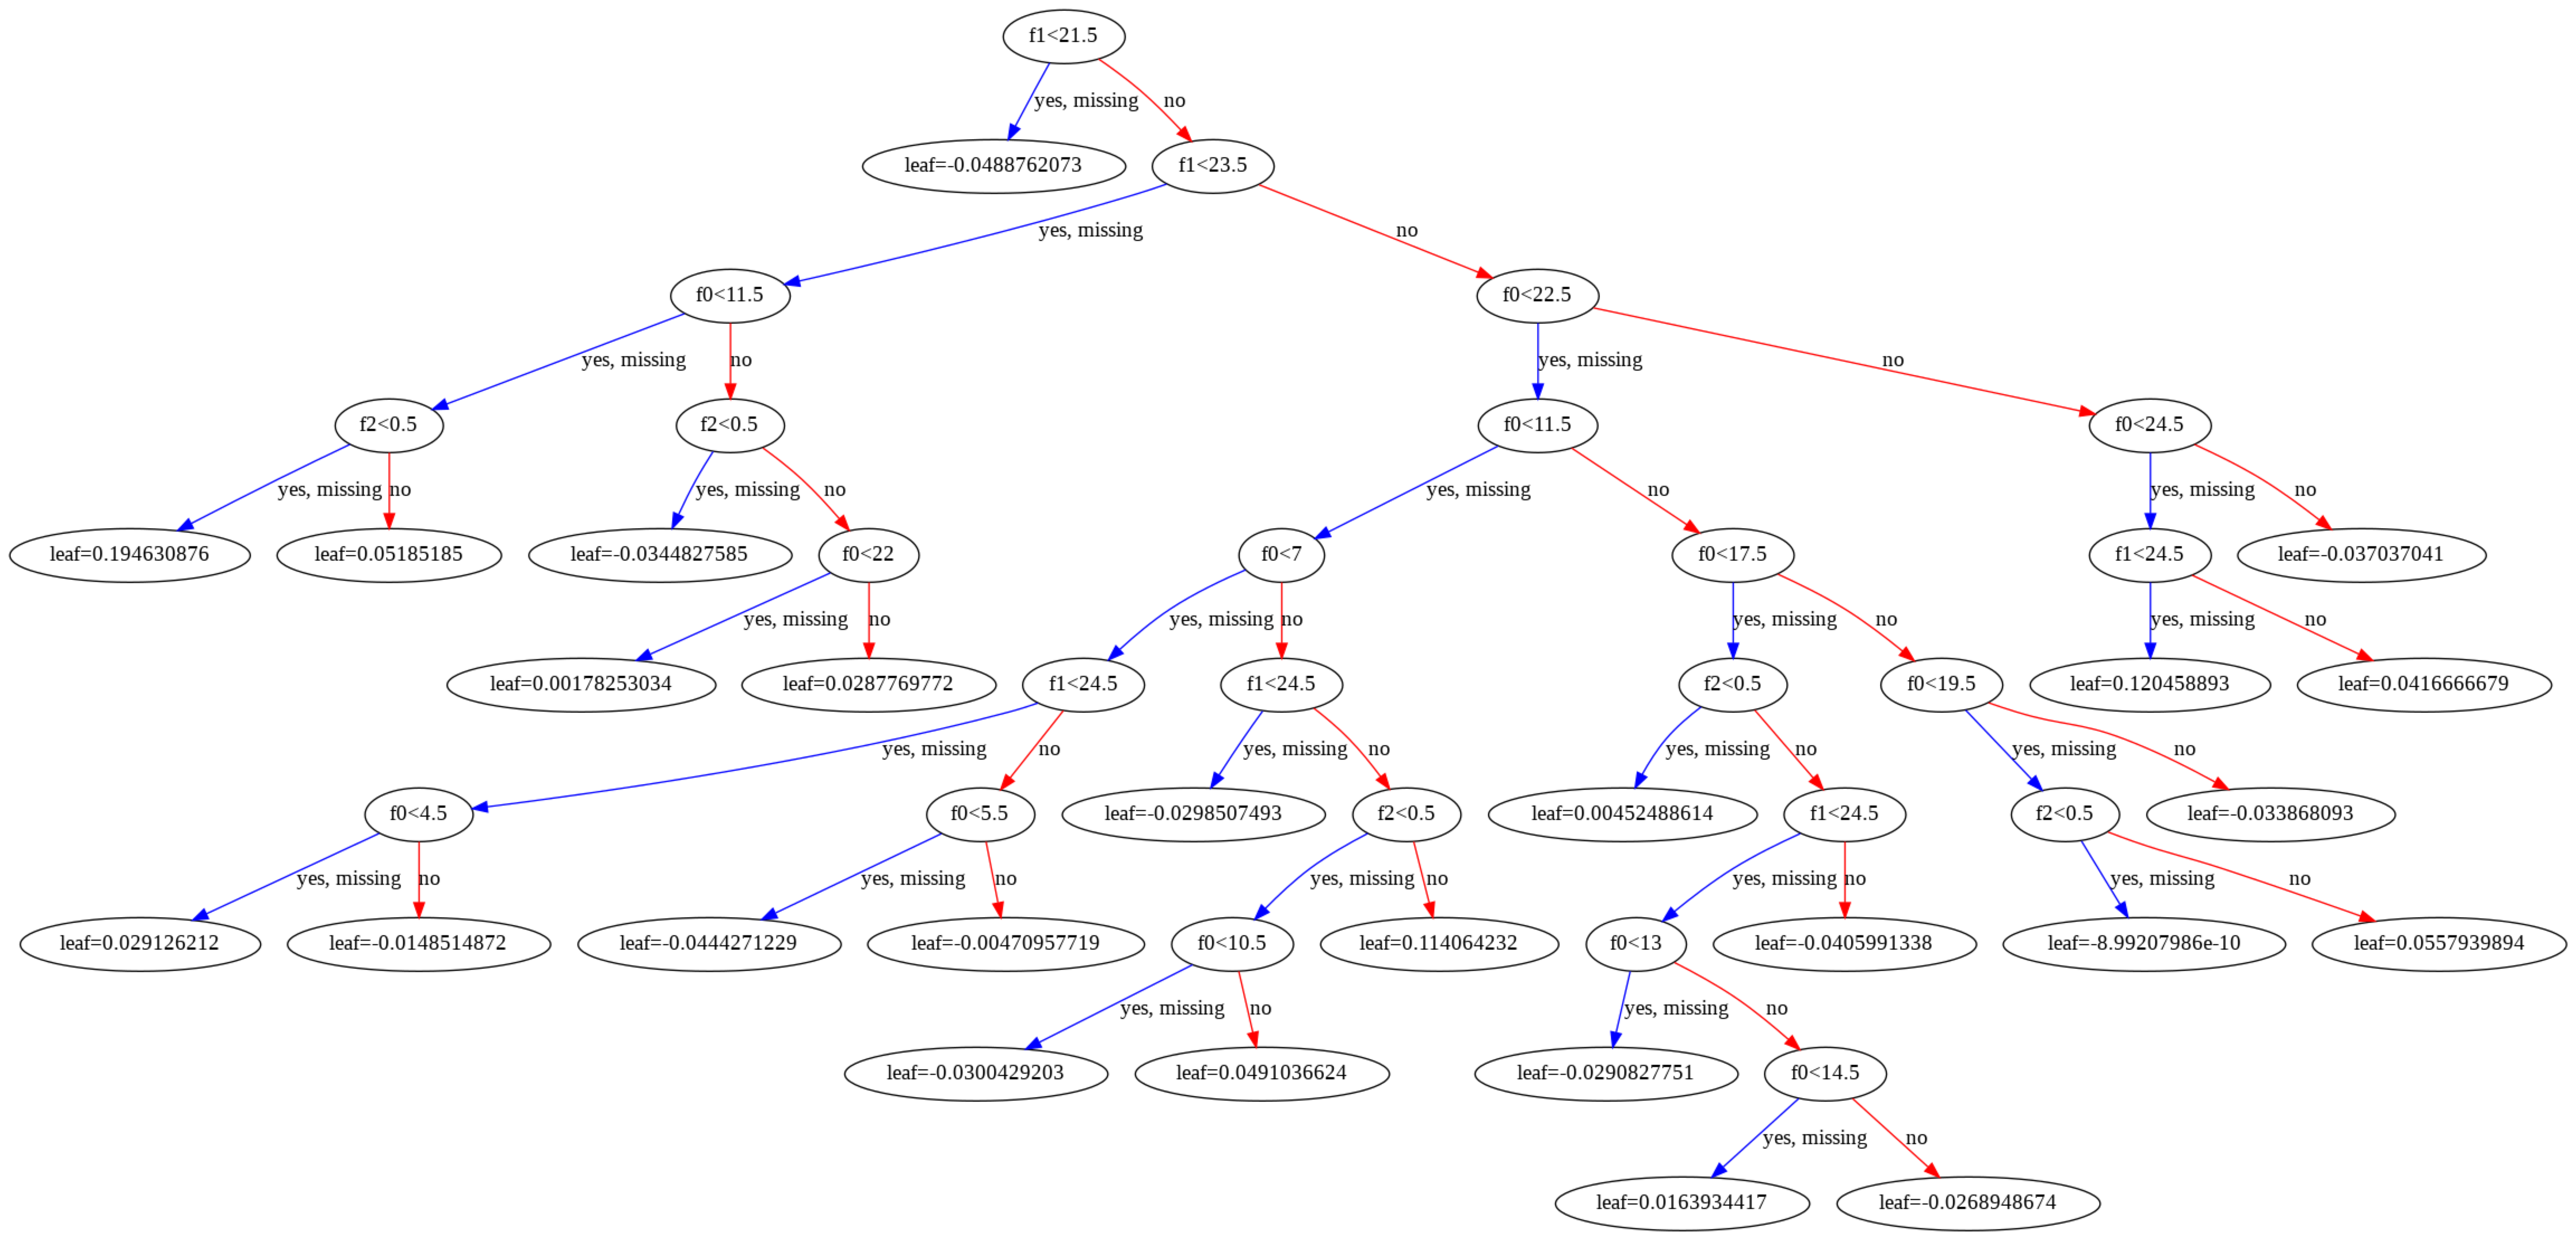

In [24]:
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams


rcParams['figure.figsize'] = 80,50
plot_tree(xgb_classifier)

# plt.figure(figsize=(50,50))
# plt.show()

**Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion='gini', random_state = 24, n_jobs = -1, n_estimators=16, max_depth=10)
rf_classifier.fit(features_train,labels_train)
print_model_performance(rf_classifier, features_test, labels_test)

Accuracy score:
 0.558974358974359
Confusion matrix:
 [[ 3  2  1  2  1  0  2  0  1  1  1  0  0  0  0  0  1  1  1  1]
 [ 0 19  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  3  7  1  0  1  1  0  1  0  1  0  0  0  0  0  4  1  0]
 [ 0  0  0  2  3  0  2  0  0  2  2  0  0  0  0  0  1  2  1  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  9  0  0  0  0  2  0  0  1  0  0  2  0  0]
 [ 4  0  0  0  0  0  0  2  0  0  5  1  0  2  0  1  2  2  1  0]
 [ 0  0  7  0  0  0  0  0 10  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0 13  3  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  0  2  1  3  0  0  1  2  1  3  1  1  2  1  1  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  1  0 15  1  0  0  0  3  0]
 [ 0  0  0  0  0  0  3  0  1  0  0  1  0  0  4  0  7  0  1  0]
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
